# 2. Feature Engineering

Tasks to perform:

2.1. Data normalization/transformation  
2.2. Compute Acoustic Typicality  

In [18]:
# import modules
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
# read data
songs_df = pd.read_csv('Data/songs_2.csv')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8427 entries, 0 to 8426
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_title          8427 non-null   object 
 1   artist_name         8427 non-null   object 
 2   song_id             8427 non-null   object 
 3   duration_ms         8427 non-null   int64  
 4   energy              8427 non-null   float64
 5   key                 8427 non-null   int64  
 6   mode                8427 non-null   int64  
 7   time_signature      8427 non-null   int64  
 8   acousticness        8427 non-null   float64
 9   danceability        8427 non-null   float64
 10  instrumentalness    8427 non-null   float64
 11  liveness            8427 non-null   float64
 12  loudness            8427 non-null   float64
 13  speechiness         8427 non-null   float64
 14  valence             8427 non-null   float64
 15  tempo               8427 non-null   float64
 16  on_cha

In [20]:
pop_df = songs_df.query('on_chart==1').sample(600)
unpop_df = songs_df.query('on_chart==0')
songs_df = pd.concat([pop_df, unpop_df])
songs_df.on_chart.value_counts()

0    1777
1     600
Name: on_chart, dtype: int64

In [21]:
songs_df.head()

song_title      artist_name                 song_id  \
5409  The Carpal Tunnel Of Love     Fall Out Boy  6FAUi2Xm6RCF0wpwG8oXGZ   
1799                  Automatic  Miranda Lambert  0B0y2FImat9j9MJTNRZWfW   
480    The Promise Of A New Day      Paula Abdul  5m8xVZhlM7E2mL9uuxZpF6   
7446             Wind Of Change        Scorpions  3ovjw5HZZv43SxTwApooCM   
6263   Blood Red And Goin' Down     Tanya Tucker  28OATvjdTNgR27ww14APCL   

      duration_ms  energy  key  mode  time_signature  acousticness  \
5409       203840   0.941    2     0               4       0.00184   
1799       247827   0.703   10     1               4       0.04350   
480        272893   0.820    1     1               4       0.09110   
7446       312360   0.524    0     1               4       0.31500   
6263       181693   0.566    9     1               4       0.37500   

      danceability  ...    tempo  on_chart  release_date  \
5409         0.466  ...  140.765         1    2007-01-01   
1799         0.591  ...   95.993         1    2014-06-02   
480          0.754  ...  119.835         1    1991-01-01   
7446         0.452  ...  151.505         1    1990-01-01   
6263         0.662  ...  107.497         1    1972-01-01   

                   artist_id           artist  explicit  popularity  \
5409  4UXqAaa6dQYAk18Lv7PEgX     Fall Out Boy         0          50   
1799  66lH4jAE7pqPlOlzUKbwA0  Miranda Lambert         0          57   
480   4PpmBoqphQusNFsxuVKb6j      Paula Abdul         0          39   
7446  27T030eWyCQRmDyuvr1kxY        Scorpions         0          77   
6263  7dmeVSH4lJqxXU7C87dKIB     Tanya Tucker         0          31   

     days_since_release artist_followers       genre  
5409               5377          9036626  emo modern  
1799               2668          2869894     country  
480               11221           747870         pop  
7446              11586          4833860        rock  
6263              18161           446886     country  

[5 rows x 25 columns]

In [22]:
# log transform fields with large numbers
songs_df['artist_followers_norm'] = np.log(songs_df['artist_followers'])
songs_df['days_since_release_norm'] = np.log(songs_df['days_since_release'])

In [23]:
acoustic_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode']
add_cols = ['song_id', 'genre']
acoustic_cols = acoustic_cols + add_cols 
acoustic_df = songs_df[acoustic_cols]
acoustic_cols

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'mode',
 'song_id',
 'genre']

In [24]:
# min-max normalisation 
def normalise_df(df):
    norm_df = df.set_index(['song_id', 'genre'])
    norm_df = norm_df.dropna()
    norm_df = (norm_df-norm_df.min())/(norm_df.max()-norm_df.min())
    norm_df = norm_df.add_suffix('_norm')
    norm_df = norm_df.reset_index()
    return norm_df

norm_acoustic_df = normalise_df(acoustic_df)

In [25]:
# merge normed cols to og df

full_songs_df = songs_df.merge(right=norm_acoustic_df,
                                    how='left',
                                    on=['song_id', 'genre'])
full_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2377 entries, 0 to 2376
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   song_title               2377 non-null   object 
 1   artist_name              2377 non-null   object 
 2   song_id                  2377 non-null   object 
 3   duration_ms              2377 non-null   int64  
 4   energy                   2377 non-null   float64
 5   key                      2377 non-null   int64  
 6   mode                     2377 non-null   int64  
 7   time_signature           2377 non-null   int64  
 8   acousticness             2377 non-null   float64
 9   danceability             2377 non-null   float64
 10  instrumentalness         2377 non-null   float64
 11  liveness                 2377 non-null   float64
 12  loudness                 2377 non-null   float64
 13  speechiness              2377 non-null   float64
 14  valence                 

In [26]:
# group acoustic cols by genre
acoustic_by_genre_df = norm_acoustic_df.groupby('genre').mean()
acoustic_by_genre_df

danceability_norm  energy_norm  loudness_norm  \
genre                                                              
adult standards             0.563088     0.459989       0.774096   
age new                     0.376337     0.152850       0.646838   
album rock                  0.605649     0.600992       0.744266   
alternative metal           0.485146     0.861997       0.907715   
alternative r&b             0.749215     0.476990       0.819309   
...                              ...          ...            ...   
trap                        0.668858     0.615850       0.864313   
trap vapor                  0.722423     0.543991       0.834381   
trap viral                  0.814679     0.515657       0.837663   
water                       0.207845     0.850997       0.643581   
wave                        0.641632     0.809596       0.880847   

                   speechiness_norm  acousticness_norm  instrumentalness_norm  \
genre                                                                           
adult standards            0.042732           0.395934               0.051689   
age new                    0.048969           0.993976               0.923000   
album rock                 0.036591           0.163655               0.000000   
alternative metal          0.077980           0.000518               0.001079   
alternative r&b            0.173480           0.521837               0.012754   
...                             ...                ...                    ...   
trap                       0.221273           0.170596               0.077001   
trap vapor                 0.193890           0.177241               0.035521   
trap viral                 0.194589           0.117202               0.076398   
water                      0.057794           0.255445               0.942857   
wave                       0.051053           0.031448               0.023573   

                   liveness_norm  valence_norm  tempo_norm  duration_ms_norm  \
genre                                                                          
adult standards         0.167835      0.513261    0.587403          0.166637   
age new                 0.107497      0.205911    0.531616          0.131468   
album rock              0.054141      0.624365    0.500363          0.108152   
alternative metal       0.089212      0.348629    0.635798          0.167222   
alternative r&b         0.318838      0.469289    0.579364          0.133242   
...                          ...           ...         ...               ...   
trap                    0.174481      0.397607    0.650900          0.115765   
trap vapor              0.130698      0.330226    0.543655          0.112874   
trap viral              0.155168      0.449746    0.685633          0.122400   
water                   0.618672      0.017674    0.478287          0.143649   
wave                    0.197455      0.752487    0.630629          0.213915   

                   mode_norm  
genre                         
adult standards     0.812500  
age new             0.555556  
album rock          0.000000  
alternative metal   0.800000  
alternative r&b     0.250000  
...                      ...  
trap                0.500000  
trap vapor          0.727273  
trap viral          0.666667  
water               1.000000  
wave                1.000000  

[164 rows x 11 columns]

In [27]:
# get avg genre similarity
from sklearn.metrics.pairwise import cosine_similarity

def get_sim_df(grouped_df):
    genre_sim_matrix = cosine_similarity(grouped_df)
    genre_sim_df = pd.DataFrame(genre_sim_matrix, 
                                columns=grouped_df.index.values, 
                                index=grouped_df.index) \
                                .reset_index()

    # get avg_typicality
    genre_sim_df = genre_sim_df.set_index('genre')
    return genre_sim_df

In [28]:
# get avg genre similarity of acoustic composition

acoustic_avg_sim_df = get_sim_df(acoustic_by_genre_df)
acoustic_avg_sim_df

adult standards   age new  album rock  alternative metal  \
genre                                                                         
adult standards           1.000000  0.751682    0.839056           0.934492   
age new                   0.751682  1.000000    0.560330           0.587950   
album rock                0.839056  0.560330    1.000000           0.842570   
alternative metal         0.934492  0.587950    0.842570           1.000000   
alternative r&b           0.919321  0.726594    0.927803           0.843755   
...                            ...       ...         ...                ...   
trap                      0.952592  0.677883    0.919035           0.957732   
trap vapor                0.970249  0.678494    0.857733           0.962413   
trap viral                0.962595  0.669399    0.887658           0.948595   
water                     0.760991  0.776604    0.536177           0.775710   
wave                      0.961870  0.601280    0.851888           0.972239   

                   alternative r&b  alternative uk  ambient idm  and bass  \
genre                                                                       
adult standards           0.919321        0.929199     0.841433  0.893599   
age new                   0.726594        0.691314     0.970232  0.711604   
album rock                0.927803        0.935622     0.647512  0.776036   
alternative metal         0.843755        0.887720     0.733163  0.953624   
alternative r&b           1.000000        0.941367     0.805680  0.805288   
...                            ...             ...          ...       ...   
trap                      0.950068        0.955085     0.800386  0.930215   
trap vapor                0.918954        0.926589     0.798834  0.928338   
trap viral                0.929612        0.950908     0.787660  0.920328   
water                     0.649980        0.721198     0.881485  0.895590   
wave                      0.856769        0.929758     0.731648  0.916315   

                   anglican liturgy  atl trap  ...      soul  soul southern  \
genre                                          ...                            
adult standards            0.827982  0.912925  ...  0.975338       0.987951   
age new                    0.808326  0.765630  ...  0.686694       0.685480   
album rock                 0.474550  0.847897  ...  0.929674       0.859998   
alternative metal          0.649506  0.907217  ...  0.927144       0.943896   
alternative r&b            0.713626  0.885113  ...  0.951706       0.909618   
...                             ...       ...  ...       ...            ...   
trap                       0.675677  0.957512  ...  0.965844       0.951602   
trap vapor                 0.742844  0.947223  ...  0.955820       0.962529   
trap viral                 0.696343  0.960553  ...  0.962155       0.955714   
water                      0.636226  0.821976  ...  0.695401       0.748458   
wave                       0.669342  0.906726  ...  0.963300       0.980000   

                      sound  soundtrack    trance      trap  trap vapor  \
genre                                                                     
adult standards    0.733988    0.822876  0.900806  0.952592    0.970249   
age new            0.739665    0.903102  0.635118  0.677883    0.678494   
album rock         0.605721    0.654471  0.899245  0.919035    0.857733   
alternative metal  0.778678    0.781626  0.945423  0.957732    0.962413   
alternative r&b    0.691348    0.741657  0.912441  0.950068    0.918954   
...                     ...         ...       ...       ...         ...   
trap               0.767125    0.811179  0.972728  1.000000    0.984049   
trap vapor         0.742549    0.812262  0.940972  0.984049    1.000000   
trap viral         0.727156    0.811389  0.945706  0.989071    0.991600   
water              0.975807    0.910731  0.807082  0.741252    0.751745   
wave               0.735771    0.771278  0.929907  0.947445  

In [29]:
# calc raw pairwise similarity

def calc_pw_similarity(feature_df):

    sim_df = feature_df.set_index(['song_id', 'genre'])

    sim_matrix = cosine_similarity(sim_df)
    raw_sim_df = pd.DataFrame(sim_matrix, columns=sim_df.index.values, index=sim_df.index)\
                    .reset_index()\
                    .set_index('genre')
    raw_sim_df = raw_sim_df.drop(columns=['song_id'])
    return raw_sim_df

acoustic_raw_sim_df = calc_pw_similarity(norm_acoustic_df)
acoustic_raw_sim_df

(6FAUi2Xm6RCF0wpwG8oXGZ, emo modern)  \
genre                                              
emo modern                              1.000000   
country                                 0.800601   
pop                                     0.831768   
rock                                    0.746548   
country                                 0.783712   
...                                          ...   
sleep                                   0.618006   
hip hop                                 0.555848   
trance                                  0.815034   
cali rap                                0.821329   
punk                                    0.784779   

            (0B0y2FImat9j9MJTNRZWfW, country)  (5m8xVZhlM7E2mL9uuxZpF6, pop)  \
genre                                                                          
emo modern                           0.800601                       0.831768   
country                              1.000000                       0.968063   
pop                                  0.968063                       1.000000   
rock                                 0.962088                       0.917299   
country                              0.970403                       0.974204   
...                                       ...                            ...   
sleep                                0.714445                       0.645509   
hip hop                              0.464867                       0.412970   
trance                               0.965412                       0.901920   
cali rap                             0.945188                       0.970533   
punk                                 0.971657                       0.920322   

            (3ovjw5HZZv43SxTwApooCM, rock)  (28OATvjdTNgR27ww14APCL, country)  \
genre                                                                           
emo modern                        0.746548                           0.783712   
country                           0.962088                           0.970403   
pop                               0.917299                           0.974204   
rock                              1.000000                           0.960166   
country                           0.960166                           1.000000   
...                                    ...                                ...   
sleep                             0.757300                           0.711835   
hip hop                           0.525602                           0.537258   
trance                            0.945910                           0.904852   
cali rap                          0.931819                           0.985762   
punk                              0.969195                           0.936755   

            (5eNfNxIPecUutWixq67H5X, gold mellow)  \
genre                                               
emo modern                               0.789699   
country                                  0.992468   
pop                                      0.978662   
rock                                     0.969910   
country                                  0.986042   
...                                           ...   
sleep                                    0.697733   
hip hop                                  0.444739   
trance                                   0.941258   
cali rap                                 0.963362   
punk                                     0.967876   

            (1u7kQUb3lQcpHaYRfia13A, rock)  (0yz2J4wsXFCjMjpJ6A74yV, pop)  \
genre                                                                       
emo modern                        0.554261                       0.973708   
country                           0.803701                       0.816252   
pop                               0.781199                       0.860010   
rock                              0.906323                       0.750634   
country                           0.893018                       0.815210   
...        

In [30]:
# get genre weights

def get_weights(col, genre_sim_df):
    genre_1 = col.name[-1]
    genre_2 = col.index

    genre_weight = genre_sim_df.loc[genre_1, genre_2]
    return genre_weight

acoustic_genre_weights_df = acoustic_raw_sim_df.apply(lambda c: get_weights(c, acoustic_avg_sim_df))
acoustic_genre_weights_df

(6FAUi2Xm6RCF0wpwG8oXGZ, emo modern)  \
genre                                              
emo modern                              1.000000   
country                                 0.835768   
pop                                     0.884932   
rock                                    0.877508   
country                                 0.835768   
...                                          ...   
sleep                                   0.581871   
hip hop                                 0.912768   
trance                                  0.939353   
cali rap                                0.827264   
punk                                    0.927589   

            (0B0y2FImat9j9MJTNRZWfW, country)  (5m8xVZhlM7E2mL9uuxZpF6, pop)  \
genre                                                                          
emo modern                           0.835768                       0.884932   
country                              1.000000                       0.991749   
pop                                  0.991749                       1.000000   
rock                                 0.995243                       0.996465   
country                              1.000000                       0.991749   
...                                       ...                            ...   
sleep                                0.773155                       0.755191   
hip hop                              0.958566                       0.983905   
trance                               0.927431                       0.953396   
cali rap                             0.972448                       0.979561   
punk                                 0.972534                       0.984388   

            (3ovjw5HZZv43SxTwApooCM, rock)  (28OATvjdTNgR27ww14APCL, country)  \
genre                                                                           
emo modern                        0.877508                           0.835768   
country                           0.995243                           1.000000   
pop                               0.996465                           0.991749   
rock                              1.000000                           0.995243   
country                           0.995243                           1.000000   
...                                    ...                                ...   
sleep                             0.769928                           0.773155   
hip hop                           0.973448                           0.958566   
trance                            0.949088                           0.927431   
cali rap                          0.973036                           0.972448   
punk                              0.984648                           0.972534   

            (5eNfNxIPecUutWixq67H5X, gold mellow)  \
genre                                               
emo modern                               0.812775   
country                                  0.992700   
pop                                      0.980394   
rock                                     0.984107   
country                                  0.992700   
...                                           ...   
sleep                                    0.753054   
hip hop                                  0.936659   
trance                                   0.918151   
cali rap                                 0.955404   
punk                                     0.968631   

            (1u7kQUb3lQcpHaYRfia13A, rock)  (0yz2J4wsXFCjMjpJ6A74yV, pop)  \
genre                                                                       
emo modern                        0.877508                       0.884932   
country                           0.995243                       0.991749   
pop                               0.996465                       1.000000   
rock                              1.000000                       0.996465   
country                           0.995243                       0.991749   
...        

In [31]:
# get avg genre-weighted typicality of acoustic compositions

def get_avg_typicality(raw_sim_df, genre_weights_df, col_name=None):

    weighted_sim_df = raw_sim_df.mul(genre_weights_df.values)

    avg_typicality_df = weighted_sim_df.apply(lambda r: (r.sum()-1)/len(r), axis=1)
    avg_typicality_df = avg_typicality_df.reset_index() \
                        .drop(columns=['genre']) \
                        .rename(columns={0:f'avg_{col_name}_typ'})

    return avg_typicality_df

acoustic_avg_typ_df = get_avg_typicality(acoustic_raw_sim_df, 
                                        acoustic_genre_weights_df,
                                        col_name='acoustic')
acoustic_avg_typ_df

avg_acoustic_typ
0             0.560340
1             0.720442
2             0.720697
3             0.734965
4             0.747246
...                ...
2372          0.589630
2373          0.489129
2374          0.673099
2375          0.739706
2376          0.681870

[2377 rows x 1 columns]

In [32]:
# merge with main_cols
full_songs_df = pd.concat([full_songs_df, acoustic_avg_typ_df], axis=1)
full_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2377 entries, 0 to 2376
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   song_title               2377 non-null   object 
 1   artist_name              2377 non-null   object 
 2   song_id                  2377 non-null   object 
 3   duration_ms              2377 non-null   int64  
 4   energy                   2377 non-null   float64
 5   key                      2377 non-null   int64  
 6   mode                     2377 non-null   int64  
 7   time_signature           2377 non-null   int64  
 8   acousticness             2377 non-null   float64
 9   danceability             2377 non-null   float64
 10  instrumentalness         2377 non-null   float64
 11  liveness                 2377 non-null   float64
 12  loudness                 2377 non-null   float64
 13  speechiness              2377 non-null   float64
 14  valence                 

Text(0, 0.5, 'count')

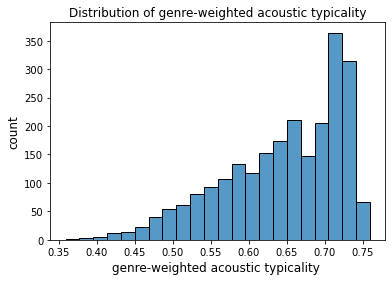

In [33]:
# avg acoustic typicality plot

sns.histplot(full_songs_df['avg_acoustic_typ'])
plt.title('Distribution of genre-weighted acoustic typicality', fontsize=12)
plt.xlabel('genre-weighted acoustic typicality ', fontsize=12)
plt.ylabel('count', fontsize=12)

In [34]:
# write to csv
full_songs_df.to_csv('Data/songs_final_3.csv', index=False)